In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import ast
from matplotlib.ticker import FuncFormatter


from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills']= df['job_skills'].apply(lambda job_skills: ast.literal_eval(job_skills) if pd.notna(job_skills) else job_skills) 

df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

df_DA_US.dropna(subset=['salary_year_avg'],inplace=True)

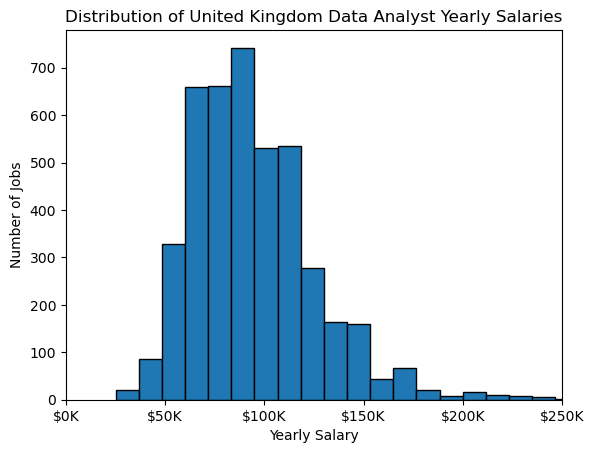

In [3]:
from matplotlib.ticker import FuncFormatter
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
plt.xlim(0,250000)
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}K'.format(x / 1000)))
plt.title('Distribution of United Kingdom Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

c:\Users\harsh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


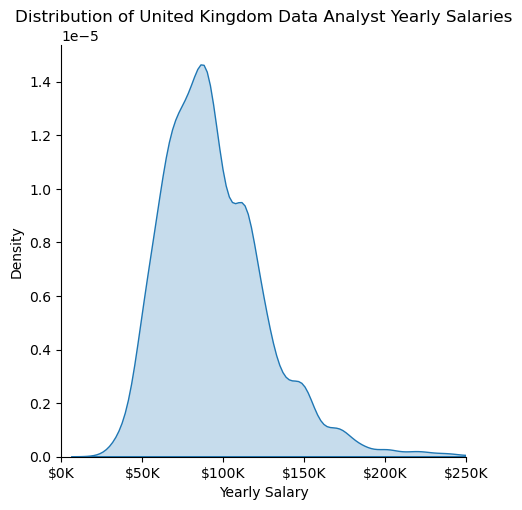

In [4]:
sns.displot(df_DA_US['salary_year_avg'],kind= 'kde', fill= True)
plt.xlim(0,250000)
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}K'.format(x / 1000)))
plt.title('Distribution of United Kingdom Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Density')
plt.show()

In [5]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

# list of salaries for each job title
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

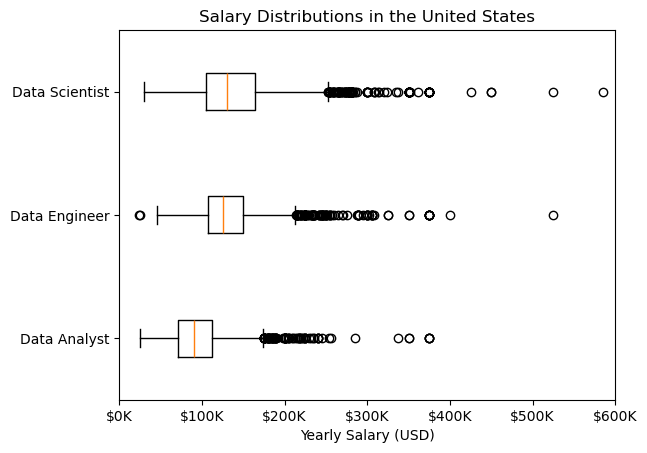

In [6]:
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

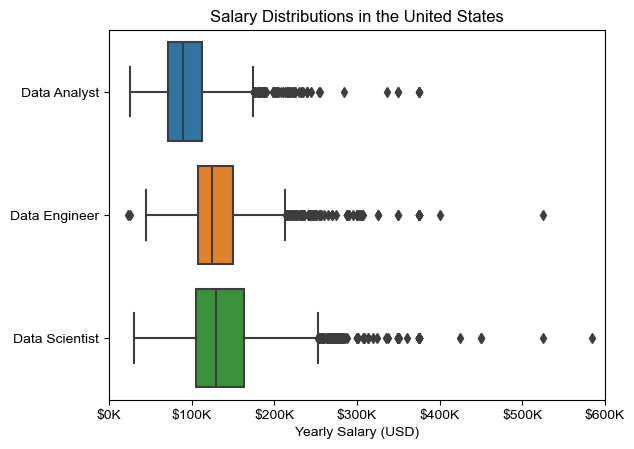

In [7]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short', order= job_titles)
sns.set_theme(style='ticks')

# this is all the same
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [8]:
df_DA_US=df_DA_US.explode('job_skills')
df_DA_US_Top_Pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending= False)
df_DA_US_Top_Pay = df_DA_US_Top_Pay.head(10)
df_DA_US_Top_Skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending= False)
df_DA_US_Top_Skills=df_DA_US_Top_Skills.head(10).sort_values(by='median', ascending=False)


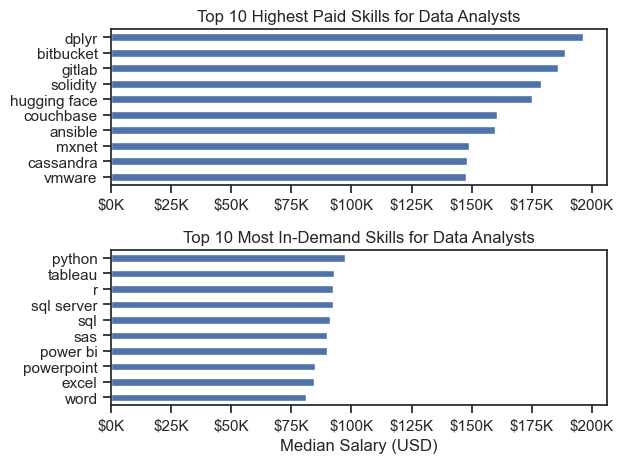

In [9]:
fig, ax = plt.subplots(2,1)
df_DA_US_Top_Pay[::-1].plot(kind= 'barh', y= 'median', ax= ax[0], legend=False)
ax[0].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}K'.format(x / 1000)))
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')

df_DA_US_Top_Skills[::-1].plot(kind= 'barh', y='median', ax= ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}K'.format(x / 1000)))
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')

plt.tight_layout()
plt.show()

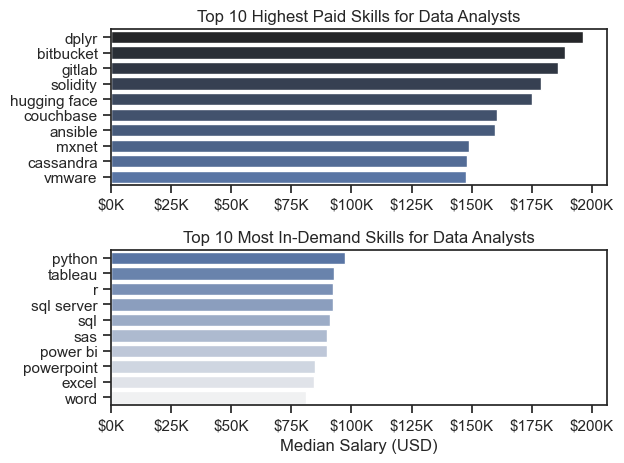

In [10]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')
sns.barplot(data= df_DA_US_Top_Pay, x = 'median', y = df_DA_US_Top_Pay.index, ax= ax[0], palette= 'dark:b')
#df_DA_US_Top_Pay[::-1].plot(kind= 'barh', y= 'median', ax= ax[0], legend=False)
ax[0].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}K'.format(x / 1000)))
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')

sns.barplot(data= df_DA_US_Top_Skills, x = 'median', y = df_DA_US_Top_Skills.index, ax= ax[1], palette= 'light:b_r')
#df_DA_US_Top_Skills[::-1].plot(kind= 'barh', y='median', ax= ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '${:,.0f}K'.format(x / 1000)))
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')

plt.tight_layout()
plt.show()